<a href="https://colab.research.google.com/github/KirPim/DS_school_2020_home_work/blob/main/HW8_lessons_9_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

Ноутбук в колаб: https://colab.research.google.com/drive/1d-vvpJW8IWSPeodFnfaEVaZIQrys8uU0?usp=sharing

**Дедлайн: 01.01.2021, 23:59**


Формат отчетности - jupyter notebook. Однако вычислять производные не обязательно в Markdown. Если вычисляете вручную, то дополнительно с ноутбуком, отправляйте pdf-файл с расписанным решением.

### Пример реализации градиентного спуска: https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_9/gradient_methods.ipynb

# Задания

Перед выполнением ДЗ посмотрите на ноутбук, прикрепленный по ссылке выше. Там вы найдете реализацию градиентного спуска с постоянным и дробным шагом.

### Задание 1. [1 point]

Релизуйте градиентный спуск с постоянным шагом и с дробным шагом для функции
$$
y = x_{1}^{2}+5 x_{2}^{2}
$$

в произвольно выбранной Вами точке.

Поэксперементируйте с разными значениями шага (скорости обучения), попробуйте хотя бы по 2-3 разных значения.

In [309]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [310]:
def f(x):
  return x[0]**2 + 5*x[1]**2

def grad_f(x):
  return np.array([2*x[0], 10*x[1]]) 

In [311]:
#Градиентный спуск с постоянным шагом
def grad_descent_const_step(x = np.array([0, 0]), alpha = 0.001, epsilon = 0.05):
    grad = grad_f(x)
    n = 0
    check = 0
    while (np.linalg.norm(grad) > epsilon) or (check < 3):
        x = x - alpha*grad
        grad = grad_f(x)
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    print("Градиентный спуск с постоянным шагом alpha = {} выполнил {} шагов".format(alpha, n))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    print("Значние функции в точке: {}".format(f(x)))
    return x

In [312]:
#Градиентный спуск с дробным шагом

def grad_descent_step_splitting(x = np.array([0, 0]), alpha = 1, epsilon = 0.05, ksi = 0.5, lambda_d = 0.35):
    grad = grad_f(x)
    n = 0
    n_alpha = 0
    alpha_k = alpha
    x_k0 = x
    check = 0
    while np.linalg.norm(grad) > epsilon or check < 3:
        grad = grad_f(x_k0)
        x_k1 = x_k0 - alpha_k*grad
        while f(x_k1) - f(x_k0) > - alpha_k * ksi * (np.linalg.norm(grad)**2):
            alpha_k *= lambda_d
            x_k1 = x_k0 - alpha_k*grad
            n_alpha+=1
        x_k0 = x_k0 - alpha_k*grad
        alpha_k = alpha
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    x = x_k0
    print("Градиентный спуст с дроблением шага выполнил {} шагов".format(n))
    print("Заданная alpha = {}".format(alpha))
    print("Выполнено {} итераций дробления шага".format(n_alpha))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    print("Значние функции в точке: {}".format(f(x)))
    return x

In [313]:
x0=[1, 2]

In [314]:
alpha1 = 0.01
alpha2 = 0.01

a = grad_descent_const_step(x = x0, alpha = alpha1)
print('')
b = grad_descent_step_splitting(x = x0, alpha = alpha2)

Градиентный спуск с постоянным шагом alpha = 0.01 выполнил 185 шагов
Точка с координатами х1 = 0.02381354235199539, x2 = 6.853213187843448e-09
Значние функции в точке: 0.000567084799350513

Градиентный спуст с дроблением шага выполнил 186 шагов
Заданная alpha = 0.01
Выполнено 0 итераций дробления шага
Точка с координатами х1 = 0.023337271504955483, x2 = 6.167891869059103e-09
Значние функции в точке: 0.0005446282412961973


In [315]:
alpha1 = 0.05
alpha2 = 0.1

a = grad_descent_const_step(x = x0, alpha = alpha1)
print('')
b = grad_descent_step_splitting(x = x0, alpha = alpha2)

Градиентный спуск с постоянным шагом alpha = 0.05 выполнил 38 шагов
Точка с координатами х1 = 0.018248003631400726, x2 = 7.275957614183426e-12
Значние функции в точке: 0.00033298963653161405

Градиентный спуст с дроблением шага выполнил 20 шагов
Заданная alpha = 0.1
Выполнено 0 итераций дробления шага
Точка с координатами х1 = 0.01152921504606847, x2 = 0.0
Значние функции в точке: 0.0001329227995784916


In [316]:
alpha1 = 0.1
alpha2 = 100

a = grad_descent_const_step(x = x0, alpha = alpha1)
print('')
b = grad_descent_step_splitting(x = x0, alpha = alpha2)

Градиентный спуск с постоянным шагом alpha = 0.1 выполнил 19 шагов
Точка с координатами х1 = 0.014411518807585589, x2 = 0.0
Значние функции в точке: 0.00020769187434139315

Градиентный спуст с дроблением шага выполнил 16 шагов
Заданная alpha = 100
Выполнено 102 итераций дробления шага
Точка с координатами х1 = 0.004473259252649832, x2 = 0.0007046703205447061
Значние функции в точке: 2.2492849644700225e-05


### Задание 2. [3 points]

Для функции из предыдущего задания реализуйте градиентный спуск, в котором значение шага (скорости обучения) будет изменяться по формуле циклического косинусного ожига. ( в англ. литературе - cosine annealing learning rate или cosine decay lr). 

Доп. литература:
- Циклический косинусный отжиг https://habr.com/ru/post/332534/

- Пример colise decay в библиотеке Pytorch:
https://www.programmersought.com/article/12164650026/

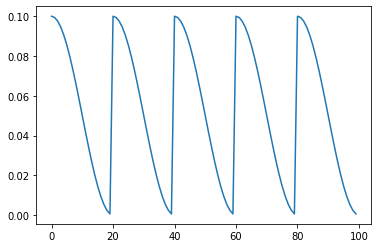

In [317]:
def cosine_decay(t, T, M, alpha_beg = 0.1):
  return alpha_beg /2 * (np.cos(np.pi * (t % (T / M)) / (T / M) ) + 1)

#cosine_decay(9, 100, 5, alpha_beg = 0.01)

T = 100
M = 5
x = np.arange(T)
alpha = np.array([cosine_decay(i, T, M) for i in x])
#alpha
plt.plot(x, alpha)
plt.show()

In [318]:
#Градиентный спуск с косинусным отжигом
def grad_descent_cos_dec(T, M, x = np.array([0, 0]), alpha_beg = 0.1):
    grad = grad_f(x)
    t = 0
    X_snap_shot = []
    Y_snap_shot = []    
    while t < T:
        alpha = cosine_decay(t, T, M, alpha_beg)
        x = x - alpha * grad
        grad = grad_f(x)        
        if (t + 1) % (T / M) == 0:
          X_snap_shot.append(x)
          Y_snap_shot.append(f(x))
        t += 1    
    X_snap_shot = np.array([i for i in X_snap_shot])
    Y_snap_shot = np.array([i for i in Y_snap_shot])
    
    for i in range(len(Y_snap_shot)):
      if Y_snap_shot[i] == min(Y_snap_shot):
        result = X_snap_shot[i]
        break
    print(f'Параметры косинусного отжига: эпох {T}, снэп-шотов {M}, начальный alpha = {alpha_beg}') 
    print(f'Snap_shots X: \n{X_snap_shot}') 
    print(f'Snap_shots Y: \n{Y_snap_shot}') 
    print("Точка минимума: {}".format(result))
    print("Значние функции в точке: {}".format(f(result)))   
    return result

In [319]:
x0=[1, 2]
res = grad_descent_cos_dec(100, 5, x = x0)  

Параметры косинусного отжига: эпох 100, снэп-шотов 5, начальный alpha = 0.1
Snap_shots X: 
[[1.02202592e-01 0.00000000e+00]
 [1.04453698e-02 0.00000000e+00]
 [1.06754387e-03 0.00000000e+00]
 [1.09105750e-04 0.00000000e+00]
 [1.11508905e-05 0.00000000e+00]]
Snap_shots Y: 
[1.04453698e-02 1.09105750e-04 1.13964991e-06 1.19040648e-08
 1.24342359e-10]
Точка минимума: [1.11508905e-05 0.00000000e+00]
Значние функции в точке: 1.2434235890663626e-10


### Задание 3. [0.75 point]
Проверьте работу Вашего градиентного спуска с косинусным отжигом на произвольной функции ( полином должен быть не меньше 3-ьего порядка и задан в пространстве не меньше $R^3$).

In [320]:
def f(x):
  return 2*x[0]**3 + 3*x[1]**2 + x[2]**2 - 1  

def grad_f(x):
  return np.array([6*x[0]**2, 6*x[1], 2*x[2]])  

In [321]:
x0=[1, 2, 3]
res = grad_descent_cos_dec(10000, 10, x = x0) 

Параметры косинусного отжига: эпох 10000, снэп-шотов 10, начальный alpha = 0.1
Snap_shots X: 
[[3.27914485e-003 5.30626068e-177 2.11111594e-047]
 [1.65129751e-003 4.94065646e-324 1.48560350e-094]
 [1.10366484e-003 0.00000000e+000 1.04542707e-141]
 [8.28840776e-004 0.00000000e+000 7.35672585e-189]
 [6.63611217e-004 0.00000000e+000 5.17696706e-236]
 [5.53314763e-004 0.00000000e+000 3.64305922e-283]
 [4.74459887e-004 0.00000000e+000 2.47032823e-323]
 [4.15278870e-004 0.00000000e+000 9.88131292e-324]
 [3.69225239e-004 0.00000000e+000 9.88131292e-324]
 [3.32367066e-004 0.00000000e+000 9.88131292e-324]]
Snap_shots Y: 
[-0.99999993 -0.99999999 -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.        ]
Точка минимума: [3.32367066e-004 0.00000000e+000 9.88131292e-324]
Значние функции в точке: -0.9999999999265682


### Задание 4.
Случайная величина X задана следующей функцией распределения:
$$
f(x)=\left\{\begin{array}{r}
0 \text { npu } x \leq \pi \\
-\cos x \text { npu } \pi<x \leq \frac{3}{2} \pi \\
\text { 0 npu } x>\frac{3}{2} \pi
\end{array}\right.
$$

1. Постройте данную функцию распределения при помощи библиотеки seaborn **[0.25 point]**
2. Найдите плотность вероятности. **[1 point]**
3. Постройте график полученной плотности вероятности **[0.25 point]**

4. Определить вероятность попадания случайной величины X в интервал $\left[\pi, \frac{5}{4} \pi\right]$ **[0.75 point]**

5. Найти математическое ожидание и дисперсию случайной величины X . **[0.75 point]**

Так как мы не проходили интегрирование, то в 4 и 5 пунктах можете использовать
wolfram alpha (https://www.wolframalpha.com) для интегрирования. Однако 2ой пункт задания (на нахождение производной) должен быть расписан!

###Решение

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


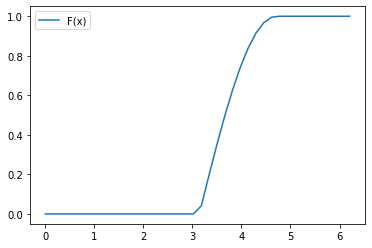

In [322]:
# 1) Постройте данную функцию распределения при помощи библиотеки seaborn

def F(x):
  return 0 if x < np.pi else - np.sin(x) if x<= 3/2*np.pi else 1

x = np.arange(0, 2*np.pi, 1/(2*np.pi))
y_c = np.array([F(i) for i in x])

#plt.plot(x, y)
sns.lineplot(x, y_c, label='F(x)')
#plt.legend()
plt.show()

In [323]:
# 2) Найдите плотность вероятности
# Плотность вероятности задана в условии задачи

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


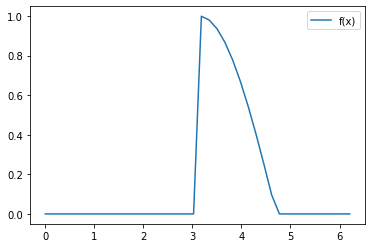

In [324]:
# 3) Постройте график полученной плотности вероятности

def f(x):
  return 0 if x < np.pi else - np.cos(x) if x<= 3/2*np.pi else 0

y_d = np.array([f(i) for i in x])
sns.lineplot(x, y_d, label='f(x)')
plt.show()


In [325]:
# 4) Определить вероятность попадания случайной величины X в интервал [π,5/4π]
a = np.array([np.pi, 5/4*np.pi])
P = F(a[1]) - F(a[0])
print(f'Вероятность попадания X в интервал [{a[0]}, {a[1]}] равна {P}')

Вероятность попадания X в интервал [3.141592653589793, 3.9269908169872414] равна 0.7071067811865476


__5)__ Найти математическое ожидание и дисперсию случайной величины X

$M[X]=-\int_{\pi}^{\frac{3}{2} \pi} x \cos x dx
= -x\sin x  + \int_{\pi}^{\frac{3}{2} \pi} \sin x dx
= (-x\sin x - \cos x) \left\|\begin{array}1\frac{3}{2} \pi \\\pi\end{array}\right.
=\frac{3}{2} \pi - 0 - (-\pi \cdot 0 + 1) = \frac{3}{2} \pi - 1
$
$D[X]=-\int_{\pi}^{\frac{3}{2} \pi} x^{2} \cos x dx - (\frac{3}{2} \pi - 1)^{2}
= -x^{2}\sin x + \int_{\pi}^{\frac{3}{2} \pi} 2x\sin x dx - (\frac{3}{2} \pi - 1)^{2}
= -x^{2}\sin x - 2x\cos x + 2\int_{\pi}^{\frac{3}{2} \pi} \cos x dx - (\frac{3}{2} \pi - 1)^{2}
= (-x^{2}\sin x - 2x\cos x + 2\sin x )\left\|\begin{array}1\frac{3}{2} \pi \\\pi\end{array}\right. - (\frac{3}{2} \pi - 1)^{2}
=\frac{9}{4} \pi^{2} - 2 - 2\pi - (\frac{3}{2} \pi - 1)^{2}
=\frac{9}{4} \pi^{2} - 2 - 2\pi - \frac{9}{4} \pi^{2} + 3\pi - 1
=\pi - 3
$

In [326]:
#Проверка на сгенерированной выборке по данному распределению

import random
# y = np.random.uniform(0, 1)
# x = np.arcsin(y) + np.pi
n = 10000
X = np.array([np.arcsin(np.random.uniform(0, 1)) + np.pi for i in range(n)])
#X
print(f'Теоретическое M[X]: {3/2*np.pi - 1}')
print(f'Выборочное среднее: {np.mean(X)}')
print(f'Теоретическая D[X]: {np.pi - 3}')
print(f'Выборочная дисерсия: {np.std(X) ** 2}')

Теоретическое M[X]: 3.7123889803846897
Выборочное среднее: 3.711600453668472
Теоретическая D[X]: 0.14159265358979312
Выборочная дисерсия: 0.14017720659517055


### Задание 5 [1.5 point]

 Случайная величина Х задана функцией распределения F(x).

 $$F(x)=\left\{\begin{array}{c}0, x \leq 1 \\ x-1,1<x \leq 2 \\ 1, x>2\end{array}\right.$$

 1. Является ли случайная величина Х непрерывной?

 2. имеет ли случайная величина Х плотность вероятности f(X)? Если имеет, найти ее. 
 3. постройте графики f(X) и F(X), если такое возможно.


###Решение
__1)__ X является непрерывной

__2)__ Плотность вероятности величины X:
$$f(x)=\left\{\begin{array}{c}0, x \leq 1 \\ 1, 1<x \leq 2 \\ 0, x>2\end{array}\right.$$

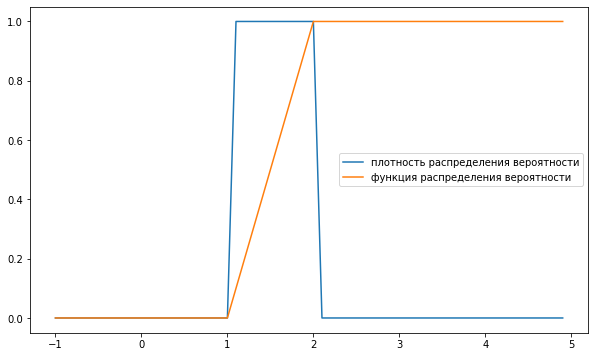

In [327]:
def F(x):
  return 0 if x <= 1 else 1 if x > 2 else x - 1

def f(x):
  return 1 if x > 1 and x <= 2 else 0

x = np.arange(-1, 5, 0.1)
c = np.array([F(i) for i in x])
p = np.array([f(i) for i in x])

plt.figure(figsize = (10, 6))
plt.plot(x, p, label='плотность распределения вероятности')
plt.plot(x, c, label='функция распределения вероятности')
plt.legend()
plt.show()

### Задание 6

Рассмотрим несбалансированный набор данных с соотношением меньшего класса к большему 1: 100, где 100 экземпляров принадлежит меньшему классу, а 10 000 большему.

Модель ML делает прогнозы и предсказывает 120 примеров как принадлежащих к классу меньшинства, 90 из которых верны, а 30 - неверны.

Найти:

- Precision **[0.5 point]**
- Recall **[0.5 point]**
- $F_1$ метрику **[0.5 point]**

In [328]:
mp_mtx = np.array([[90, 30], [10, 9990]])
prec = mp_mtx[0][0] / (mp_mtx[0][0] + mp_mtx[0][1])
rec = mp_mtx[0][0] / (mp_mtx[0][0] + mp_mtx[1][0])
F1 = 2 * prec * rec / (prec + rec)

print(mp_mtx)
print(f'Precision: {prec}')
print(f'Recall: {rec}')
print(f'F1: {F1}')

[[  90   30]
 [  10 9990]]
Precision: 0.75
Recall: 0.9
F1: 0.8181818181818182
